# Perceptron

# 행렬기법

In [45]:
import numpy as np

# input_data = [[...input data 1...], [...input data 2...], ...]

class Perceptron_matrix:
    def __init__(self, eta=0.01, epoch=50, random_state=1):
        self.eta = eta 
        self.epoch = epoch
        self.random_state = random_state
    
    def initialize(self, input_data):
        rgen = np.random.RandomState(self.random_state)
        self.weight = rgen.normal(loc=0.0, scale=0.01, size=input_data.shape[1])
        self.bias = np.float_(0.)
        self.errors = []

    def fit(self, input_data, result_data):
        self.initialize(input_data)
        for _ in range(self.epoch):
            error = 0
            for data, result in zip(input_data, result_data):
                delta = self.eta * (result - self.predict(data))
                self.weight += data * delta
                self.bias = delta 
                error += int(delta != 0.0)
            self.errors.append(error)
            print("-----epoch (", _ , "/", self.epoch ,")-------- error:", error)
        return self

    def predict(self, input_data):
        return np.where(self.caculator_perceptron(input_data) >= 0.0, 1, 0)
    
    def caculator_perceptron(self, input_data):
        return np.dot(input_data, self.weight) + self.bias

## 곱셈 기법

In [46]:
import numpy as np

# input_data = [[...input data 1...], [...input data 2...], ...]

class Perceptron_multiplex:
    def __init__(self, eta=0.01, epoch=50, random_state=1):
        self.eta = eta 
        self.epoch = epoch
        self.random_state = random_state

    def initialize(self, input_data):
        rgen = np.random.RandomState(self.random_state)
        self.weight = rgen.normal(loc=0.0, scale=0.01, size=input_data.shape[1])
        self.bias = np.float_(0.)
        self.errors = []

    def fit(self, input_data, result_data):
        self.initialize(input_data)
        for _ in range(self.epoch):
            error = 0
            for data, result in zip(input_data, result_data):
                delta = self.eta * (result - self.predict(data))
                self.weight += data * delta
                self.bias = delta 
                error += int(delta != 0.0)
            self.errors.append(error)
            print("-----epoch (", _ , "/", self.epoch ,")-------- error:", error)
        return self

    def predict(self, input_data):
        return 1 if self.caculator_perceptron(input_data) >= 0.0 else 0

    def caculator_perceptron(self, input_data):
        return self.multiplex_array(input_data, self.weight) + self.bias

    def multiplex_array(self, input_data, weight):
        result = 0
        for data, w in zip(input_data, weight):
            result += data * w
        return result

URL : https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


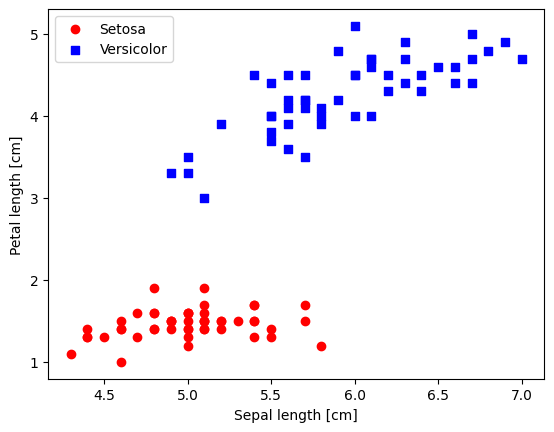

In [9]:
import os
import pandas as pd

site = 'https://archive.ics.uci.edu/ml/'\
    'machine-learning-databases/iris/iris.data'
print('URL :', site)
df = pd.read_csv(site, header=None, encoding='utf-8')

import matplotlib.pyplot as plt 
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', 0, 1) # 정답 추출

X = df.iloc[0:100, [0,2]].values # 0번과 2번 추출

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left') # 왼쪽 위, label 블록
plt.show()

In [47]:
ppn = Perceptron_matrix(eta=0.1, epoch=10)
ppn.fit(X, y)

-----epoch ( 0 / 10 )-------- error: 2
-----epoch ( 1 / 10 )-------- error: 2
-----epoch ( 2 / 10 )-------- error: 3
-----epoch ( 3 / 10 )-------- error: 1
-----epoch ( 4 / 10 )-------- error: 0
-----epoch ( 5 / 10 )-------- error: 0
-----epoch ( 6 / 10 )-------- error: 0
-----epoch ( 7 / 10 )-------- error: 0
-----epoch ( 8 / 10 )-------- error: 0
-----epoch ( 9 / 10 )-------- error: 0


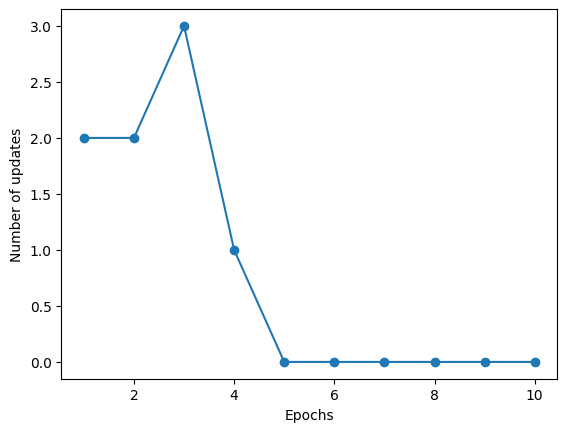

In [48]:
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [49]:
ppn_mul = Perceptron_multiplex(eta=0.1, epoch=10)
ppn_mul.fit(X, y)

-----epoch ( 0 / 10 )-------- error: 2
-----epoch ( 1 / 10 )-------- error: 2
-----epoch ( 2 / 10 )-------- error: 3
-----epoch ( 3 / 10 )-------- error: 1
-----epoch ( 4 / 10 )-------- error: 0
-----epoch ( 5 / 10 )-------- error: 0
-----epoch ( 6 / 10 )-------- error: 0
-----epoch ( 7 / 10 )-------- error: 0
-----epoch ( 8 / 10 )-------- error: 0
-----epoch ( 9 / 10 )-------- error: 0


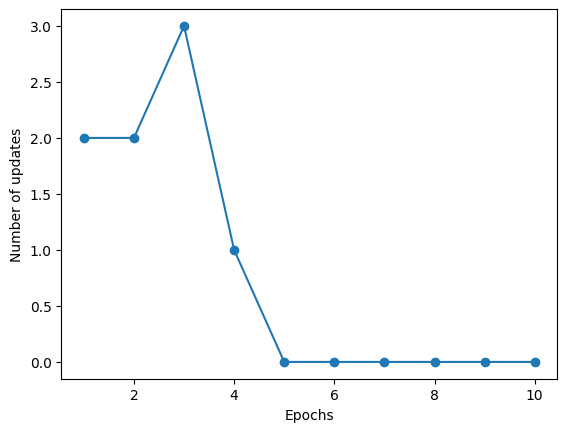

In [50]:
plt.plot(range(1, len(ppn_mul.errors) + 1), ppn_mul.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [51]:
print(ppn.predict([4.5, 1]))
print(ppn.predict([5.0, 2]))
print(ppn.predict([6.0, 3]))
print(ppn.predict([7.0, 4]))
print(ppn.predict([7.0, 5]))
print(ppn.predict([7.0, 6]))
print(ppn.predict([5.0, 4]))

0
0
0
0
1
1
1


In [52]:
print(ppn_mul.predict([4.5, 1]))
print(ppn_mul.predict([5.0, 2]))
print(ppn_mul.predict([6.0, 3]))
print(ppn_mul.predict([7.0, 4]))
print(ppn_mul.predict([7.0, 5]))
print(ppn_mul.predict([7.0, 6]))
print(ppn_mul.predict([5.0, 4]))

0
0
0
0
1
1
1
